In [106]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import Patch
import matplotlib.ticker as mticker

# constants
#from toymc import const

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from other_limits.Nlimits import *
from other_limits.DPlimits import *

In [51]:
save_folder = '../fig/7_constraints_comparison/'
!mkdir -p $save_folder

# Global defs

In [70]:
## Plot the parameter space
fsize = 12
rcParams['text.usetex'] = False
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman', 'serif']
rcParams['figure.figsize'] = (1.2*3.7,1.2*2.3617)
# rcParams['lines.linewidth'] = 1.0
rcParams['hatch.linewidth'] = 0.3
# rcParams['axes.linewidth'] = 0.4
rcParams['axes.labelsize'] = fsize
# rcParams['xtick.direction'] = 'in'
# rcParams['xtick.major.width'] = 0.4
# rcParams['xtick.minor.width'] = 0.4
rcParams['xtick.labelsize'] = fsize
# rcParams['ytick.direction'] = 'in'
# rcParams['ytick.major.width'] = 0.4
# rcParams['ytick.minor.width'] = 0.4
rcParams['ytick.labelsize'] = fsize
rcParams['legend.frameon'] = False
rcParams['legend.fontsize'] = 0.8*fsize
rcParams['legend.loc'] = 'lower right'
rcParams["text.latex.preamble"] = r'''
    \usepackage{amsmath,amssymb,amsthm}
    \usepackage{siunitx}
'''

# Experimental T2K constraints

In [17]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
# import numpy as np
# import pandas as pd

from Likelihood import LEff
from mcmc_utils import labels_fancy
from dark_nus_utils import load_datasets
from const import alphaQED

In [18]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)
selection = 'cut_based'

In [40]:
levels = {0.68: -2.3/2,
          0.9: -4.61/2,
          0.95: -5.99/2}

In [19]:
my_exp_analysis = load_datasets(hierarchy, D_or_M, timeit=True, direct_load_objects=True)[f'{hierarchy}_{D_or_M}']

heavy majorana
Wall time: 0.6165385246276855 s, CPU time: 0.6063007900000006


In [20]:
from ctau_utils import ctau_heavy
def heavy_nonminimal_posterior(m4=0.1, mz=1.25, Umu4_2=2.2e-7, Ud4_2=0.01, alpha_d=0.4, epsilon=2.1e-2):
    Vmu4_alpha_epsilon2 = alpha_d * Umu4_2 * alphaQED * epsilon**2
    Valpha4_alpha_epsilon2 = alpha_d * Ud4_2 * alphaQED * epsilon**2
    ctau = ctau_heavy(m4, 
                      mz, 
                      Valpha4_alpha_epsilon2, 
                      D_or_M)
    this_mu = Vmu4_alpha_epsilon2/my_exp_analysis.Vmu4_alpha_epsilon2
    mu, sigma2 = my_exp_analysis.kde_n_events(df=my_exp_analysis.df_base.query(selection),
                                                     m4mz=(m4, mz),
                                                     ctau=ctau,
                                                     mu=this_mu,
                                                     distance=distance,
                                                     smoothing=smoothing_pars)
    return LEff(0, mu, sigma2), mu, sigma2, ctau

In [21]:
heavy_nonminimal_posterior_v = np.vectorize(heavy_nonminimal_posterior)

## DARK PHOTON PARAMETER SPACE

In [10]:
X_MIN, X_MAX = 1e-2, 1e1
Y_MIN, Y_MAX = 1e-6, 0.05

mzpr = np.geomspace(X_MIN, X_MAX, 1000)

## g-2 definitions

In [11]:
FNAL_run_combined = gminus2.weighted_average(gminus2.DELTA_FNAL, gminus2.DELTA_BNL)

In [12]:
energy, one_over_alpha = np.loadtxt("./other_limits/DPlimits/digitized/alphaQED/alpha_QED_running_posQ2.dat", unpack = True)
one_over_alpha_ew = interpolate.interp1d(energy, one_over_alpha, kind = "linear")

FACTOR = 1/2/np.pi/one_over_alpha_ew(gminus2.M_MU)

gminus2_sigmas = [2.]
gminus2_colors = ['dodgerblue']

### T2K constrain calculation

In [57]:
# setting
mz = np.geomspace(0.101, my_exp_analysis.mz_limits[1], 25)
epsilon = np.geomspace(1e-6, 1e-1, 20)
mz, epsilon = np.meshgrid(mz, epsilon)

dark_photon_Ud4_2_s = [1, 1e-2, 1e-4]

In [58]:
# calculation
t2k_dark_photon_constraints = {}
for Ud4_2 in dark_photon_Ud4_2_s:
    t2k_dark_photon_constraints[Ud4_2] = heavy_nonminimal_posterior_v(mz=mz, epsilon=epsilon, Ud4_2=Ud4_2)

## main plot

In [59]:
# m4 of choice:
this_m4 = 0.1

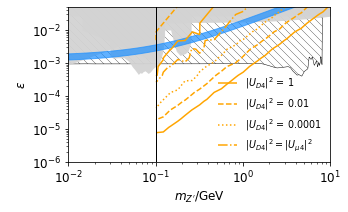

In [71]:
# trying with lines
fig = plt.figure()
axes_form = [0.14,0.15,0.82,0.76]
ax = fig.add_axes(axes_form)
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_{Z^\prime}/$GeV')
ax.set_ylabel(r'$\varepsilon$')
    
semi_visible_DP.plot_constraints(ax, X_MIN, X_MAX, separated=False)

gminus2.compute_and_plot_gminus2_region(
    ax = ax,
    mz = mzpr,
    delta_amu = FNAL_run_combined[0],
    error = FNAL_run_combined[1],
    factor = FACTOR,
    sigmas = gminus2_sigmas,
    colors = gminus2_colors
)

ax.axvline(x=this_m4, color='black', lw=1)

ax.annotate(r'$(g-2)_\mu$', xy=(2e-3,2e-3), rotation=4, fontsize=0.7*fsize, color='darkblue')

# plot
colors = ['orange']
linestyles = ['-', '--', 'dotted', '-.']
contours = {}
for Ud4_2, linestyle in zip(dark_photon_Ud4_2_s, linestyles):
    contours[Ud4_2] = plt.contour(mz, epsilon, 
                                  t2k_dark_photon_constraints[Ud4_2][0], levels=[levels[0.9]], 
                                  colors=colors, linestyles=[linestyle])
# plt.legend([cntr.legend_elements()[0][0] for cntr in contours.values()], 
#             [f'$|U_{{D4}}|^2$ = {Ud4_2}' for Ud4_2 in contours.keys()],
#            frameon=False,
#            loc='lower right')


ax.set_xlim(X_MIN,X_MAX)
fig.savefig(f"{save_folder}dark_photon.pdf", bbox_inches='tight')
plt.show()

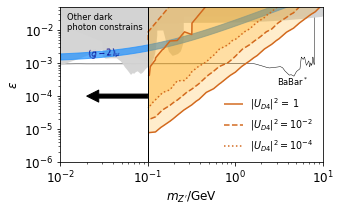

In [121]:
# trying with shading
fig = plt.figure()
axes_form = [0.14,0.15,0.82,0.76]
ax = fig.add_axes(axes_form)
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_{Z^\prime}/$GeV')
ax.set_ylabel(r'$\varepsilon$')
    
semi_visible_DP.plot_constraints(ax, X_MIN, X_MAX, separated=False)

gminus2.compute_and_plot_gminus2_region(
    ax = ax,
    mz = mzpr,
    delta_amu = FNAL_run_combined[0],
    error = FNAL_run_combined[1],
    factor = FACTOR,
    sigmas = gminus2_sigmas,
    colors = gminus2_colors
)

ax.axvline(x=this_m4, color='black', lw=1)
ax.annotate('', xy=(2e-2, 1e-4), xytext=(this_m4, 1e-4), 
            arrowprops=dict(facecolor='black', shrink=0.),
            )
ax.annotate(r'$(g-2)_\mu$', xy=(2e-2,1.5e-3), rotation=4, fontsize=0.7*fsize, color='darkblue')
ax.annotate('Light mediator\nshort lived\nno ', xy=(2e-2,1.5e-3), rotation=4, fontsize=0.7*fsize, color='darkblue')

# plot
colors = ['orange', 'orange', 'orange']
linestyles = ['-', '--', 'dotted']

# colors = ['orange', 'red', 'brown']
# linestyles = ['-', '-', '-']

contours = {}
for Ud4_2, linestyle, color in zip(dark_photon_Ud4_2_s, linestyles, colors):
    contours[Ud4_2] = plt.contourf(mz, epsilon, 
                                  t2k_dark_photon_constraints[Ud4_2][0], levels=[-np.inf, levels[0.9]], 
                                  colors=[color], linestyles=[linestyle], alpha=0.2)
    contours[Ud4_2] = plt.contour(mz, epsilon, 
                                  t2k_dark_photon_constraints[Ud4_2][0], levels=[levels[0.9]], 
                                  colors=['chocolate'], linestyles=[linestyle])
plt.legend([cntr.legend_elements()[0][0] for cntr in contours.values()], 
            [f'$|U_{{D4}}|^2$ = {Ud4_2}' if Ud4_2==1 else r'$|U_{{D4}}|^2 = 10^{'+f'{np.log10(Ud4_2):.1g}'+r'}$' for Ud4_2 in contours.keys()],
           frameon=False,
           loc='lower right')

ax.set_xlim(X_MIN,X_MAX)
fig.savefig(f"{save_folder}dark_photon.pdf", bbox_inches='tight')
plt.show()

## Heavy neutrino parameter space

In [61]:
################################
# range of N mass
MN_MIN = 1e-3 # GeV
MN_MAX = 1e2 # GeV
MN = np.logspace(np.log10(MN_MIN),np.log10(MN_MAX),1000)


### Computation of T2K constraints varying $|U_{D4}|^2$

In [62]:
# setting
m4 = np.geomspace(my_exp_analysis.m4_limits[0],
                  my_exp_analysis.m4_limits[1],
                  25)
Umu4_2 = np.geomspace(1e-11,
                      1,
                      20)
m4, Umu4_2 = np.meshgrid(m4, Umu4_2)

hnl_Ud4_2_s = [1, 1e-2, 1e-4]

In [63]:
# calculation
t2k_hnl_constraints = {}
for Ud4_2 in hnl_Ud4_2_s:
    t2k_hnl_constraints[Ud4_2] = heavy_nonminimal_posterior_v(m4=m4, Umu4_2=Umu4_2, Ud4_2=Ud4_2)

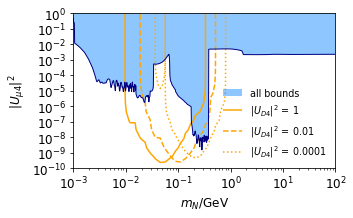

In [65]:
fig = plt.figure()
axes_form = [0.14,0.15,0.82,0.76]
ax = fig.add_axes(axes_form)
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$m_{N}$/GeV")
ax.set_ylabel(r'$|U_{\mu4 }|^2$')

usqr_bound = umu4.USQR(MN)
usqr_bound_inv = umu4.USQR_inv(MN)

##############################################
# Constraints on U\alpha4^2
# Minimal HNL -- no Zprime and all that
# ax.plot(MN, usqr_bound, color='navy', )
# ax.fill_between(MN, usqr_bound, np.ones(np.size(MN)), 
#             fc='dodgerblue', ec='None', lw =0.0, alpha=0.5, label=r'all bounds')

# most model independent bounds
ax.plot(MN, usqr_bound_inv, color='navy', lw=1)
ax.fill_between(MN, usqr_bound_inv, np.ones(np.size(MN)), 
            fc='dodgerblue', ec='None', lw =0.0, alpha=0.5, label=r'all bounds')
total_constraints_handles, total_constraints_labels = ax.get_legend_handles_labels()

# plot T2K constraints
colors = ['orange']
linestyles = ['-', '--', 'dotted']
contours = {}
for Ud4_2, linestyle in zip(hnl_Ud4_2_s, linestyles):
    contours[Ud4_2] = ax.contour(m4, Umu4_2, t2k_hnl_constraints[Ud4_2][0], 
                                 levels=[levels[0.9]], colors=colors, linestyles=[linestyle])

ax.legend(total_constraints_handles + [cntr.legend_elements()[0][0] for cntr in contours.values()], 
           total_constraints_labels + [f'$|U_{{D4}}|^2$ = {Ud4_2:.2g}' for Ud4_2 in contours.keys()],
           frameon=False,
           loc='lower right')


ax.set_xlim(MN_MIN,MN_MAX)
ax.set_ylim(1e-10,1)
ax.loglog()

ax.set_yticks([1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])

fig.savefig(f"{save_folder}hnl_umu4sqr_vs_mn.pdf", bbox_inches='tight')